<a href="https://colab.research.google.com/github/shinjangwoon/TIL/blob/master/Data%20Analysis/%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정규방정식


In [1]:
# 선형 데이터 생성
import numpy as np

X = 2 * np.random.rand(100 ,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
# 정규 방정식 사용하여 계산
# numpy 선형대수 모듈(np.linalg)에 있는 inv() 함수 사용하여 역행렬을 계산하고
# dot() 메서드를 사용해 행렬 곱셈
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1를 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.15852313],
       [2.93130766]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1를 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.15852313],
       [10.02113845]])

In [5]:
# 나눔 고딕 설치
#   !sudo apt-get install -y fonts-nanum
#   !sudo fc-cache -fv
#   !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [6]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')


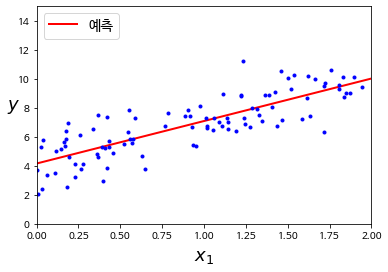

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


 
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# 사이킷런에서 선형 회귀 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.15852313]), array([[2.93130766]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.15852313],
       [10.02113845]])

In [11]:
# LinearRegression 클래스는 scipy.linalg.lstsq() 함수(최소제곱)를 기반으로 함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.15852313],
       [2.93130766]])

In [12]:
# np.linalg.pinv() 함수를 사용해 유사역행렬을 구할 수 있음
np.linalg.pinv(X_b).dot(y)

array([[4.15852313],
       [2.93130766]])

# 경사하강법

In [13]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.15852313],
       [2.93130766]])

- 정규방정식으로 찾은 것과 같음

In [16]:
weight_path_bgd = []

def plot_gradient_descent(weight, eta, weight_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - eta * gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

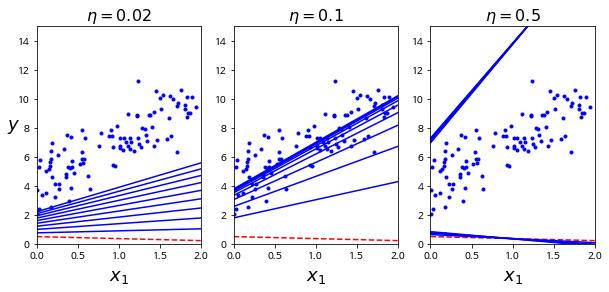

In [17]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, eta=0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta=0.5)
plt.show()

In [18]:
weight_path_sgd = []
m = len(X_b)
np.random.seed(42)

Epoch :010, weight = 
 [[3.80342694]
 [3.13940896]]
Epoch :020, weight = 
 [[4.03123399]
 [2.28084246]]
Epoch :030, weight = 
 [[4.3065751 ]
 [2.46274167]]
Epoch :040, weight = 
 [[3.31332462]
 [2.87910458]]
Epoch :050, weight = 
 [[4.78299175]
 [2.92773488]]


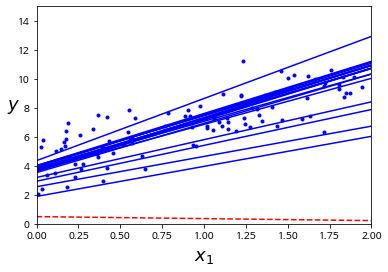

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

weight = np.random.randn(2, 1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(weight)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(weight) - yi)
        eta - learning_schedule(epoch * m + i)
        weight = weight - eta * gradients
        weight_path_sgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))
        
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

- 한 반복에서 m번 되풀이 되고, 이때 각 반복을 에포크(epoch)라고 함
- 50번만 반복하고도 좋은 값을 얻음

# SGDRegressor 
- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본 값으로 제곱 오차 비용 함수를 최적화하는 클래스

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14150192]), array([2.89423848]))

- 정규방정식으로 구한 값과 매우 비슷한 값을 얻음

# 미니배치 경사 하강법

In [23]:
weight_path_mgd = []

n_iterations = 100
minibatch_size = 20

np.random.seed(42)
weight = np.random.randn(2,1)  # random init

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(weight) - yi)
        eta = learning_schedule(t)
        weight = weight - eta * gradients
        weight_path_mgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))

Epoch :010, weight = 
 [[4.27601771]
 [3.11173827]]
Epoch :020, weight = 
 [[4.09587844]
 [2.8932398 ]]
Epoch :030, weight = 
 [[4.16222694]
 [2.93581959]]
Epoch :040, weight = 
 [[4.22728346]
 [3.02683246]]
Epoch :050, weight = 
 [[4.12439157]
 [2.91377893]]
Epoch :060, weight = 
 [[4.23494784]
 [3.02689361]]
Epoch :070, weight = 
 [[4.21354881]
 [2.98086995]]
Epoch :080, weight = 
 [[4.18645042]
 [2.94126073]]
Epoch :090, weight = 
 [[4.18131161]
 [2.92524648]]
Epoch :100, weight = 
 [[4.2032058 ]
 [2.98481677]]


In [24]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

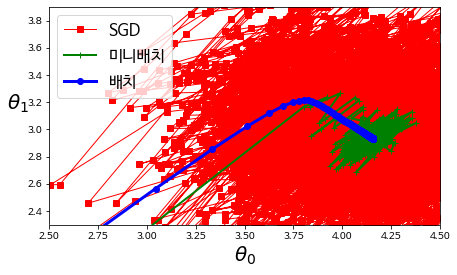

In [25]:
plt.figure(figsize=(7,4))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-+", linewidth=2, label="미니배치")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-o", linewidth=3, label="배치")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()